# Create train/test files for the challenge
- conversion_data.csv : contains all the examples with labels from the initial dataset
- conversion_data_train.csv : contains some examples with labels for model training
- conversion_data_test.csv : contains some examples without labels (will be used for prediction)
- conversions_data_test_labels.csv : contains the labels that were hidden in conversion_data_test.csv

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
# Import dataset
print("Loading dataset...")
dataset = pd.read_csv("conversion_data.csv")
print("...Done.")
print()

Loading dataset...
...Done.



# Exploration

In [3]:
# Basic stats
data_desc = dataset.describe(include='all')
display(data_desc)
print(dataset.shape)

,country,age,new_user,source,total_pages_visited,converted
count,316200,316200.000000,316200.000000,316200,316200.000000,316200.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,178092,NaN,NaN,155040,NaN,NaN
mean,NaN,30.569858,0.685465,NaN,4.872966,0.032258
std,NaN,8.271802,0.464331,NaN,3.341104,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


(316200, 6)


- Variables-cible : Y = 'converted'
- Variables explicatives : 'country',	'age', 'new_user',	'source',	'total_pages_visited'
- Nombre d'exemples : 316200

- pas d'imputation de valeurs manquantes
- Normalisation : 'age', 'total_pages_visited'
- Encodage des variables catégorielles : 'country', 'new_user', 'source'

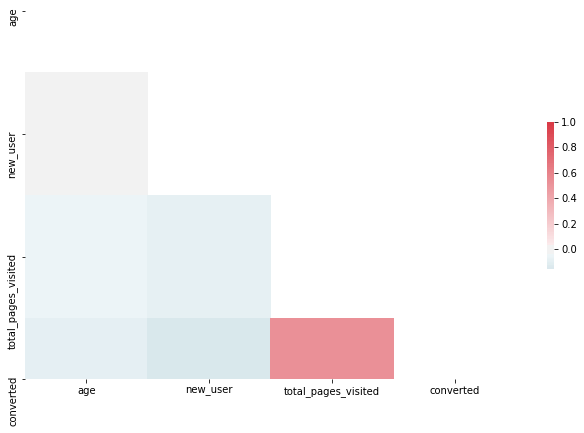

In [4]:
# Check correlations
# Compute the correlation matrix
corr = dataset.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap = cmap, square=True,  
            center=0, cbar_kws={"shrink": .3})

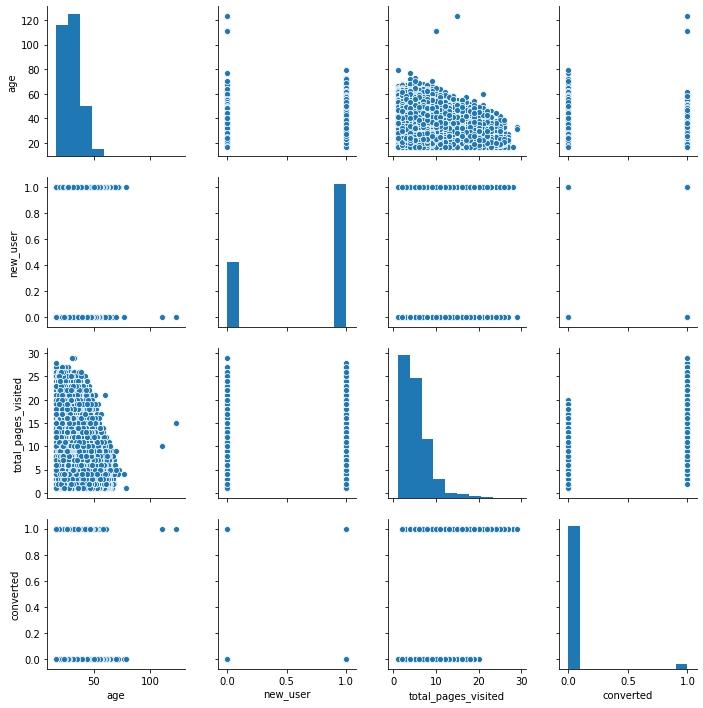

In [5]:
# Visualize pairwise dependencies
sns.pairplot(dataset)

# Train-test split and dump to file

In [6]:
# Separate target variable Y from features X
print("Separating labels from features...")
features_list = ['country',	'age', 'new_user',	'source',	'total_pages_visited']
target_variable = "converted"

X = dataset.loc[:,features_list]
Y = dataset.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
0    0
1    0
2    0
3    0
4    0
Name: converted, dtype: int64

X :
  country  age  new_user source  total_pages_visited
0      UK   25         1    Ads                    1
1      US   23         1    Seo                    5
2      US   28         1    Seo                    4
3   China   39         1    Seo                    5
4      US   30         1    Seo                    6


In [7]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0, stratify=Y)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [ ]:
data_train = pd.concat([X_train, Y_train], axis=1)
data_train.to_csv('conversion_data_train.csv', index=False)

data_test = X_test
data_test.to_csv('conversion_data_test.csv', index=False)
data_test_labels = pd.DataFrame(columns = ['converted'], data = {'converted':Y_test.to_list()})
data_test_labels.to_csv('conversion_data_test_labels.csv', index=False)

In [9]:
display(data_train.describe())
display(data_test.describe())
display(data_test_labels.describe())

,age,new_user,total_pages_visited,converted
count,284580.000000,284580.000000,284580.000000,284580.000000
mean,30.564203,0.685452,4.873252,0.032258
std,8.266789,0.464336,3.341995,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


,age,new_user,total_pages_visited
count,31620.000000,31620.000000,31620.000000
mean,30.620746,0.685579,4.870398
std,8.316736,0.464292,3.333128
min,17.000000,0.000000,1.000000
25%,24.000000,0.000000,2.000000
50%,30.000000,1.000000,4.000000
75%,36.000000,1.000000,7.000000
max,69.000000,1.000000,26.000000


,converted
count,31620.000000
mean,0.032258
std,0.176687
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000
